<a href="https://colab.research.google.com/github/muskan661/Muskan/blob/main/MuskanAmatya_Week4_TECH405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
train_dir = '/content/drive/MyDrive/Xraydataset/train'
test_dir = '/content/drive/MyDrive/Xraydataset/test'

train = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Xraydataset/train',  # Update the path as needed
    labels='inferred',
    label_mode='categorical',
    image_size=(img_width, img_height)
)

Found 148 files belonging to 2 classes.


In [11]:
# Image dimensions and parameters
img_height, img_width = 256, 256
batch_size = 32
epochs = 10

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
# Load and preprocess datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=(img_height, img_width), batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=(img_height, img_width), batch_size=batch_size
)

Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [38]:
# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [39]:
# Define CNN model
def build_model(activation):
    model = Sequential([
        Conv2D(32, (3, 3), activation=activation, input_shape=(img_height, img_width, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation=activation),
        Dropout(0.5),
        Dense(2, activation='softmax')  # Final layer for classification
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [40]:
# Activation functions to compare
activations = ['relu', 'sigmoid', 'tanh']
results = {}

for activation in activations:
    print(f"Training model with {activation} activation...")
    model = build_model(activation)
    history = model.fit(train_ds, validation_data=test_ds, epochs=epochs, verbose=1)

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)
    print(f"Test Accuracy with {activation}: {test_accuracy * 100:.2f}%")

Training model with relu activation...
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.5703 - loss: 3.8046 - val_accuracy: 0.5250 - val_loss: 0.7692
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.6503 - loss: 1.0217 - val_accuracy: 0.9750 - val_loss: 0.2555
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8284 - loss: 0.4522 - val_accuracy: 1.0000 - val_loss: 0.1486
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.9424 - loss: 0.2510 - val_accuracy: 0.7750 - val_loss: 0.3020
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8520 - loss: 0.3614 - val_accuracy: 1.0000 - val_loss: 0.0572
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.9263 - loss: 0.1780 - val_accuracy: 1.0000 - val_loss: 0.0287
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.9405 - loss: 0.1455 - val_accuracy: 1.0000 - val_loss: 0.0507
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.9309 - loss: 0.1518 - val_accur

In [44]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Lower the range
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


In [47]:
from tensorflow.keras.applications import InceptionResNetV2
IMG_SHAPE = (img_height, img_width, 3)  # Assumes img_height and img_width are defined
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

# Unfreeze the top layers of the base model (last 4 layers as an example)
for layer in base_model.layers[:-4]:
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [51]:
class_names = train.class_names
print(class_names)

# Retrieve class names
class_names = train.class_names

# Predictions and confusion matrix
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_pred = np.argmax(model.predict(test_ds), axis=-1)
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=class_names)

# Display results
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

['NORMAL', 'PNEUMONIA']
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step
Confusion Matrix:
[[20  0]
 [20  0]]

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.50      1.00      0.67        20
   PNEUMONIA       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


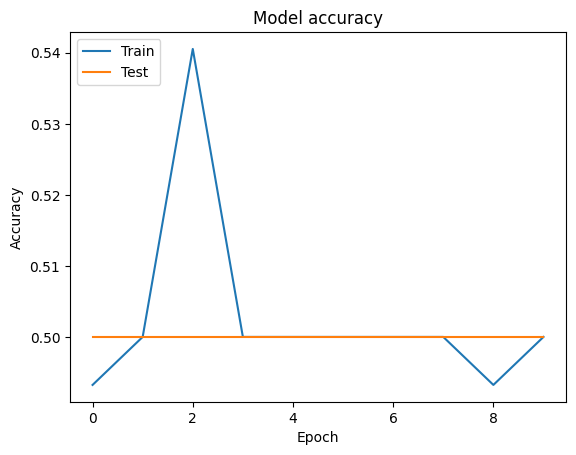

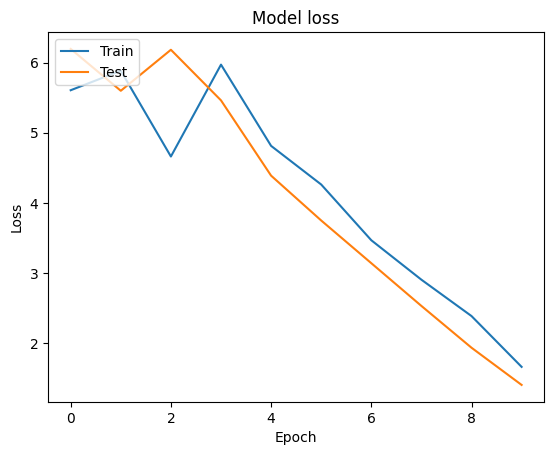

In [49]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

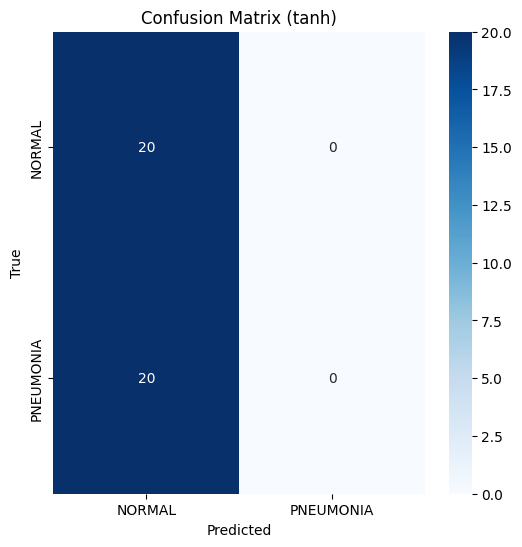

In [50]:
# Ensure class names are available
class_names = ['NORMAL', 'PNEUMONIA']  # Replace with `train.class_names` if available

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix ({activation})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Compare results
for activation, result in results.items():
    print(f"Results for {activation} activation:")
    print(result["classification_report"])